### Анализ данных в задаче кредитного скоринга

#### Роллан Сапышев

In [127]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from statsmodels.stats.weightstats import zconfint
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
import scipy
from scipy.stats import chi2_contingency

In [128]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Rollan\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### Загрузка данных

In [129]:
data = pd.read_csv('credit_card_default_analysis.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:
- LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
- SEX: пол клиента (1 = мужской, 2 = женский )
- EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
- MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
- AGE: возраст в годах
- PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
- BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
- PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
- default - индикатор невозврата денежных средств

### Задание 1

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: 

a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

Значимы ли полученные результаты с практической точки зрения ?

### а)

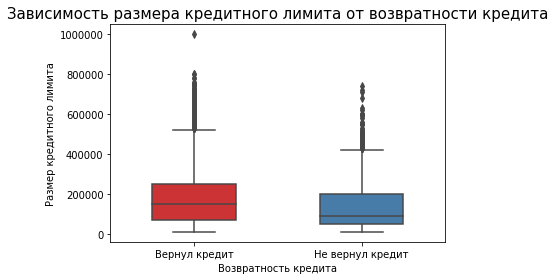

In [55]:
plot = sns.boxplot(x="default", y="LIMIT_BAL", data=data, palette="Set1",  width=0.5)
plot.set(xlabel='Возвратность кредита', ylabel='Размер кредитного лимита')
plot.set_title('Зависимость размера кредитного лимита от возвратности кредита', fontsize = 15)
plot.set_xticklabels( ('Вернул кредит', 'Не вернул кредит') )
plt.show()

###### Как видно из вышеприведенного рисунка, медиана (линия внутри прямоугольника) вернувших кредит находится выше чем тех, кто не вернул кредит. Полагать о значимости отличий, исходя из графика, не приходится по двум причинам: 1) разброс данных между возвратностью кредита накладываются друг на друга; 2) данные имеют большое количество выбросов по обеим категориям.

In [134]:
data_limit_g = data[data.default == 0]['LIMIT_BAL'].median()
data_limit_b = data[data.default == 1]['LIMIT_BAL'].median()

good_std = data[data.default == 0]['LIMIT_BAL'].std(ddof=1)/np.sqrt(len(data[data.default == 0]['LIMIT_BAL']))
bad_std = data[data.default == 1]['LIMIT_BAL'].std(ddof=1)/np.sqrt(len(data[data.default == 1]['LIMIT_BAL']))

print("доверительный интервал для медианы кредитного лимита возвращающих кредит", _tconfint_generic(data_limit_g, good_std,
                                                                       len(data['default']) - 1,
                                                                       0.05, 'two-sided'))

print("доверительный интервал для медианы кредитного лимита НЕ возвращающих кредит", _tconfint_generic(data_limit_b, bad_std,
                                                                       len(data['default']) - 1,
                                                                       0.05, 'two-sided'))

доверительный интервал для медианы кредитного лимита возвращающих кредит (148312.12032256168, 151687.87967743832)
доверительный интервал для медианы кредитного лимита НЕ возвращающих кредит (87223.88491292392, 92776.11508707608)


###### Интервальная оценка медианы размера кредитного лимита вернувших и не вернувших кредит показывает об отсутствии равенства междц ними. Тем самым, можно сделать вывод, что возвращающие кредит люди имеют более высокий кредитный лимит нежели не возвращающие.

### b)

In [135]:
print('доверительный интервал для среднего кредитного лимита возвращающих кредит', zconfint(data[data.default == 0]['LIMIT_BAL']))

доверительный интервал для среднего кредитного лимита возвращающих кредит (176411.91449742022, 179787.53765118445)


In [136]:
print('доверительный интервал для среднего кредитного лимита НЕ возвращающих кредит', zconfint(data[data.default == 1]['LIMIT_BAL']))

доверительный интервал для среднего кредитного лимита НЕ возвращающих кредит (127333.65333983443, 132885.65949922524)


###### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [137]:
stats.mannwhitneyu(data[data.default == 0]['LIMIT_BAL'], data[data.default == 1]['LIMIT_BAL'])

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

###### данные получились значимыми, тем самым можно точно утверждать, что в среднем люди, возвращающие кредит, имеют более высокий кредитный лимит, чем не возвращающие.

### Задание 2

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

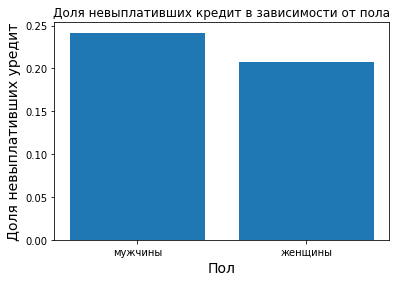

In [145]:
data_ed = [sum(data[data.SEX == 1].default)/len(data[data.SEX == 1].default), sum(data[data.SEX == 2].default)/len(data[data.SEX == 2].default)]
labels = ['мужчины', 'женщины']
plt.xticks(range(len(data_ed)), labels)
plt.bar(range(len(data_ed)), data_ed)
plt.xlabel('Пол', fontsize = 14)
plt.ylabel('Доля невыплативших уредит', fontsize = 14)
plt.title('Доля невыплативших кредит в зависимости от пола')
plt.show()

Доверительный интервал для разности долей (независимые выборки):

In [148]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [151]:
def_male = data[data.SEX == 1].default.values
def_female = data[data.SEX == 2].default.values

print('доля невыплаты кредита мужчинами:   ', float(sum(def_male)) / len(def_male))
print('доля невыплаты кредита женщинами: ', float(sum(def_female)) / len(def_female))
print('разница:       ', float(sum(def_male)) / len(def_male) - float(sum(def_female)) / len(def_female))
print('доверительный интервал: ', proportions_confint_diff_ind(def_male, def_female))

доля невыплаты кредита мужчинами:    0.2416722745625841
доля невыплаты кредита женщинами:  0.20776280918727916
разница:        0.033909465375304954
доверительный интервал:  (0.024207372179792706, 0.0436115585708172)


###### гендерный состав группы людей вернувших и не вернувших кредит НЕ отличается, ОТВЕРГАЕТСЯ на 95% доверительном уровне через оценку доверительного интервала для разности долей.

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$ (различий между мужчинами и женщинами в возврате кредита нет)

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [ ]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [153]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [154]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [155]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(data[data.SEX == 1].default, data[data.SEX == 2].default))

95% confidence interval for a difference between proportions: [0.024207, 0.043612]


In [157]:
print('p-value:', proportions_diff_z_test(proportions_diff_z_stat_ind(data[data.SEX == 1].default, data[data.SEX == 2].default)))

p-value: 4.472866521609831e-12


###### Гипотеза о том, что гендерный состав группы людей вернувших и не вернувших кредит НЕ отличается, ОТВЕРГАЕТСЯ на 95% доверительном уровне на основании Z-критерия для разности долей.

### Задание 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [75]:
doctor = round(sum(data[data.EDUCATION == 0].default)/len(data[data.EDUCATION == 0].default)*100,1)
master = round(sum(data[data.EDUCATION == 1].default)/len(data[data.EDUCATION == 1].default)*100,1)
bachelor = round(sum(data[data.EDUCATION == 2].default)/len(data[data.EDUCATION == 2].default)*100,1)
school_grad = round(sum(data[data.EDUCATION == 3].default)/len(data[data.EDUCATION == 3].default)*100,1)
elementary = round(sum(data[data.EDUCATION == 4].default)/len(data[data.EDUCATION == 4].default)*100,1)
other = round(sum(data[data.EDUCATION == 5].default)/len(data[data.EDUCATION == 5].default)*100,1)

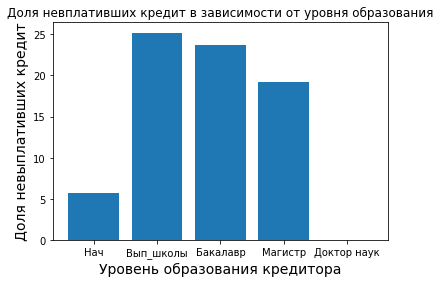

In [77]:
data_ed = [elementary,school_grad, bachelor, master, doctor]
labels = ['Нач', 'Вып_школы', 'Бакалавр', 'Магистр', 'Доктор наук']
plt.xticks(range(len(data_ed)), labels)
plt.bar(range(len(data_ed)), data_ed)
plt.xlabel('Уровень образования кредитора', fontsize = 14)
plt.ylabel('Доля невыплативших кредит', fontsize = 14)
plt.title('Доля невплативших кредит в зависимости от уровня образования')
plt.show()

Далее для наглядности выведем сводную таблицу и оценим распределение дефолтов в разрезе видов образования.

In [163]:
edu_pivot = pd.pivot_table(data, values='ID', index=['default'], columns=['EDUCATION'], aggfunc='count', fill_value = 0)
print('0=phd, 1=ma, 2=bc, 3=graduate, 4=primary, 5=other, 6=na')
edu_pivot

0=phd, 1=ma, 2=bc, 3=graduate, 4=primary, 5=other, 6=na


EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


Воспользуемся статистикой хи-квадрат для оценки ожидаемых значений количества человек вернувших и не вернувших кредит, то есть найдем ожидаемые частоты, которые бы наблюдались, если бы данные имели равномерное распределение.

In [164]:
stats.chi2_contingency(edu_pivot)

(163.21655786997073,
 1.2332626245415605e-32,
 6,
 array([[1.0903200e+01, 8.2435980e+03, 1.0926564e+04, 3.8293596e+03,
         9.5792400e+01, 2.1806400e+02, 3.9718800e+01],
        [3.0968000e+00, 2.3414020e+03, 3.1034360e+03, 1.0876404e+03,
         2.7207600e+01, 6.1936000e+01, 1.1281200e+01]]))

In [165]:
exp = stats.chi2_contingency(edu_pivot)[3].tolist()
edu_pivot - pd.DataFrame(exp)

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,3.0968,305.402,-226.564,-149.3596,20.2076,43.936,3.2812
1,-3.0968,-305.402,226.564,149.3596,-20.2076,-43.936,-3.2812


(1) гипотеза о том, что образование не влияет на то, вернет ли человек долг, НЕВЕРНА; (2) наилучшим индикатором того, что человек отдаст долг, является наличие у человека PhD (что в целом логично, высокий уровень образования = выше доход); (3) наихудшим индикатором - то, что человек является выпускником.

### Задание 4

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [167]:
#доля женатых/замужних кредиторов, не возвратившие кредит
a = sum(data[data.MARRIAGE == 1].default)/len(data[data.MARRIAGE == 1].default)*100

In [168]:
#доля холостых кредитов, возратившие кредит
b = sum(data[data.MARRIAGE == 1].default)/len(data[data.MARRIAGE == 2].default)*100

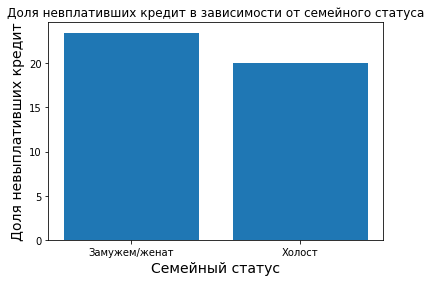

In [169]:
data_mar = [a, b]
labels = ['Замужем/женат', 'Холост']
plt.xticks(range(len(data_mar)), labels)
plt.bar(range(len(data_mar)), data_mar)
plt.xlabel('Семейный статус', fontsize = 14)
plt.ylabel('Доля невыплативших кредит', fontsize = 14)
plt.title('Доля невплативших кредит в зависимости от семейного статуса')
plt.show()

In [170]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(data[data.MARRIAGE == 1].default, data[data.MARRIAGE == 2].default))

95% confidence interval for a difference between proportions: [0.015929, 0.034938]


$H_0\colon F_{X_1}(x) = F_{X_2}(x)$ (различий между женатыми и холостыми в дефолте нет)

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [171]:
proportions_diff_z_test(proportions_diff_z_stat_ind(data[data.MARRIAGE == 1].default, data[data.MARRIAGE == 2].default))

1.448514344026819e-07

###### для женатых / замужних людей дефолт наблюдается чаще.

### Задание 5

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: 

a) о равенстве медианных значений возрастов людей 

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

Значимы ли полученные результаты с практической точки зрения ?

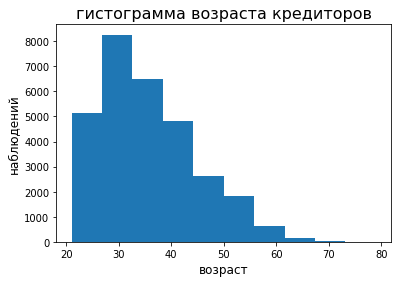

In [172]:
plt.figure(figsize(6, 4))

plt.hist(data.AGE)
plt.xlabel('возраст', fontsize = 12)
plt.ylabel('наблюдений', fontsize = 12)
plt.title('гистограмма возраста кредиторов', fontsize = 16)

pylab.show()

### a)

In [173]:
age_0 = data.AGE.loc[data.default == 0]
age_1 = data.AGE.loc[data.default == 1]

print('Медиана возративших кредит: %.0f' % age_0.median())
print('Медиана НЕ возвративших кредит: %.0f' % age_1.median())

Медиана возративших кредит: 34
Медиана НЕ возвративших кредит: 34


In [189]:
print('Difference between medians: %f' % (np.median(age_0) - np.median(age_1)))

Difference between medians: 0.000000


###### Медианные значения возрастов для двух групп людей - кто вернул кредит (default = 0) и кто его не вернул (default = 1) - СОВПАДАЮТ

Проверим гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Для начала построим гистограммы, чтобы хоть как-то оценить формы распределений.

Для проверки гипотезы подойдёт перестановочный критерий для независимых выборок.

H0: распределения выборок полностью равны

H1: распределения выборок отличаются на величину сдвига

Text(0.5, 1.0, 'Гистограмма возраста с дефолтом')

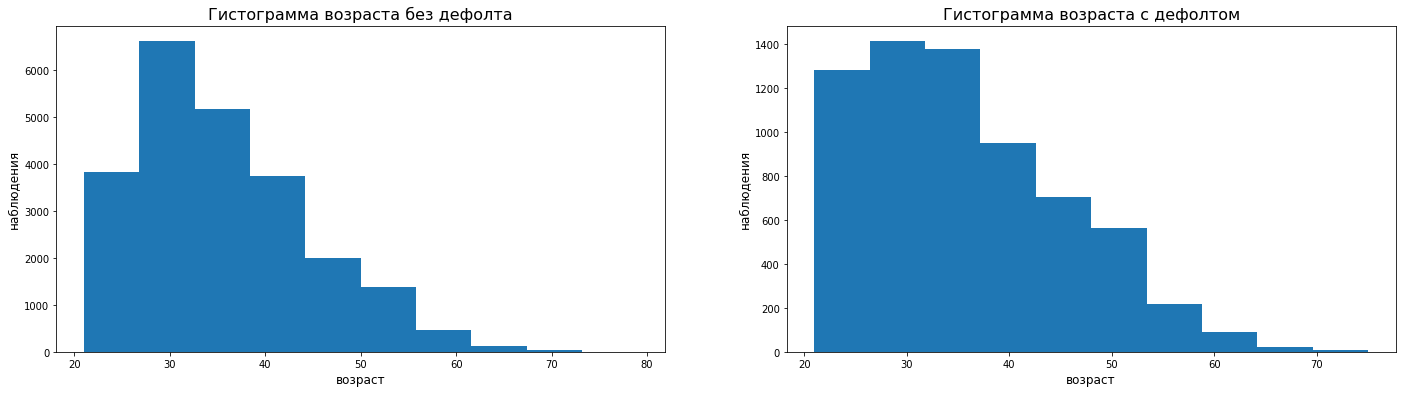

In [182]:
plt.figure(figsize(24, 6))
plt.subplot(1, 2, 1)
plt.hist(age_0)
plt.xlabel('возраст', fontsize = 12)
plt.ylabel('наблюдения', fontsize = 12)
plt.title('Гистограмма возраста без дефолта', fontsize = 16)
plt.subplot(1, 2, 2)
plt.hist(age_1)
plt.xlabel('возраст', fontsize = 12)
plt.ylabel('наблюдения', fontsize = 12)
plt.title('Гистограмма возраста с дефолтом', fontsize = 16)

In [195]:
stats.ttest_ind(age_0, age_1, equal_var = False)

Ttest_indResult(statistic=-2.3195212416592628, pvalue=0.02038649025587463)

Результат является практически значимым, потому что разница в распределениях видна невооружённым взглядом и эти данные могут учитываться при выдаче кредита.